In [13]:
import pickle as pkl
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import statistics
cmd_folder = os.getenv("SESNPATH") + "/utils"
if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)

from templutils import *

In [213]:
# Defining the functions

def der(xy):
    '''
    This function takes in the x and y data. 
    It returns the derivative of y with respect to x along with middle points of the x value.
    '''
    xder, yder = xy[1], xy[0]
    return np.array([np.diff(yder) / np.diff(xder), xder[:-1] + np.diff(xder) * 0.5])

def second_der(x, y):
    '''
    This function takes the absolute value of second derivative of y with respect to x.
    '''
    return np.abs(der(der([y, x])))[0]

def smoothness_term(x, y):
    '''
    This function takes sum over all of the absolute values of second derivative of y with respect to x.
    '''
    return np.nansum(np.abs(der(der([y, x]))), axis=1)[0]

In [214]:
colors = {'up': 'k', 'U': 'k', 'B': '#2166ac',
          'g': '#1b7837', 'rp': '#b2182b', 'ip': '#542788',
          'V': '#1b7837', 'R': '#b2182b', 'I': '#542788',
          'J': '#c51b7d', 'H': '#f46d43', 'K': '#35978f',
          'w2': '#8c510a', 'm2': '#bf812d', 'w1': '#cc4c02'}

In [215]:
su = setupvars()
bands = su.bands

In [219]:
# Read data for all SNe in all bands including photometry and saved GP fits
output_directory = os.getenv("SESNPATH") + "maketemplates/outputs/GP_template_files/"
all_sne = pkl.load(open(output_directory + "all_SNe_data_and_GP_fits.pkl", "rb"))

In [220]:
all_sne_names = list(all_params.keys()) 
print('Found %i SNe'%len(all_sn))

Found 165 SNe


In [288]:
# Let's look at an example
name = 'sn2004fe'
band = 'up'

Smoothness term for the initial GP fit is 1.7532e3 
Smoothness term for the optimized GP fit is 0.7430e0 


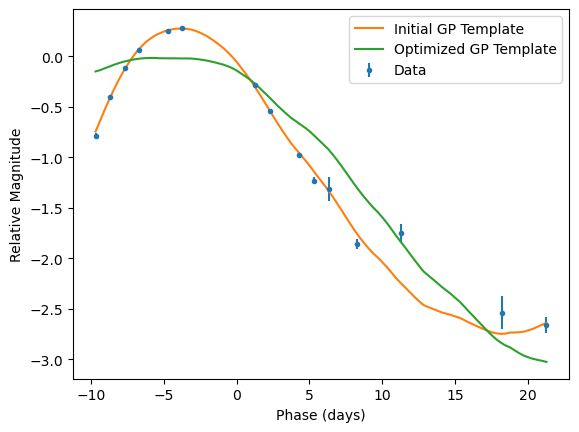

In [289]:
# Plotting data for a SN along with its initial GP fit and its optimized GP fit
# We want to see the effect of the smoothness term on smoothing the GP fit

plt.errorbar(all_sne[name][band]['x'],
             all_sne[name][band]['y'],
             yerr = all_sne[name][band]['yerr'],
            fmt = '.',
            label = 'Data')
plt.plot(all_sne[name][band]['t'],
         all_sne[name][band]['mu_init']+
         all_sne[name][band]['tmpl_t'],
         '-',
        label = 'Initial GP Template')
plt.plot(all_sne[name][band]['t'],
         all_sne[name][band]['mu_opt']+
         all_sne[name][band]['tmpl_t'],
         '-',
        label = 'Optimized GP Template')
plt.xlabel('Phase (days)')
plt.ylabel('Relative Magnitude')
plt.legend()
init_smoothness = (smoothness_term(np.log(all_sne[name][band]['t']+30), 
                      all_sne[name][band]['mu_init']))
opt_smoothness = (smoothness_term(np.log(all_sne[name][band]['t']+30), 
                      all_sne[name][band]['mu_opt']))
print('Smoothness term for the initial GP fit is %0.4fe%i '%
      (init_smoothness/(10**int(np.log10(init_smoothness))),
       np.log10(init_smoothness)))
print('Smoothness term for the optimized GP fit is %0.4fe%i '%
      (opt_smoothness/(10**int(np.log10(opt_smoothness))),
      np.log10(opt_smoothness)))

In [290]:
# printing the mean values of the second derivates of the initial GP fit,
# the second derivates of the optimized GP fit and the uncertainties in data
print(np.mean(second_der(np.log(all_sne[name][band]['t']+30), 
                                                all_sne[name][band]['mu_init'])))
print(np.mean(second_der(np.log(all_sne[name][band]['t']+30), 
                                                all_sne[name][band]['mu_opt'])))
print(np.mean(all_sne[name][band]['yerr']))

17.88961065643803
0.007582042337873594
0.04806667


In [237]:
# We save the mean of the second derivates of the initial and optimized GP fits for each SN in 
# each band in the dict "variances" along with the mean uncertainty in the data of each SN in 
# each band.


variances = {}

for s, sn in enumerate(all_sne_names):
    for b in bands:
        bb = b
        if b == 'i':
            bb = 'ip'
        if b == 'u':
            bb = 'up'
        if b == 'r':
            bb = 'rp'
        if bb in all_params[sn].keys():
            try:
                variances[bb]
            except:
                variances[bb] = []
            else:
                pass
            try:
                variances[bb].append([sn,
                                      np.mean(second_der(np.log(all_sne[sn][bb]['t']+30), 
                                                all_sne[sn][bb]['mu_init'])),
                                      np.mean(second_der(np.log(all_sne[sn][bb]['t']+30), 
                                                     all_sne[sn][bb]['mu_opt'])),
                                       np.mean(all_sne[sn][bb]['yerr'])])
            except:
                print('No Successful optimized fits for %s in band %s.'%(sn, bb))

No Successful optimized fits for sn2004ex in band up.
No Successful optimized fits for sn2006el in band ip.
No Successful optimized fits for sn2006ir in band J.


band V
Names of SNe with higher mean second var in the optimized GP fit:
['ASASSN-14ms' 'iPTF13bvn' 'LSQ13ccw' 'OGLE-2012-sn-006' 'sn1954A'
 'sn1962L' 'sn1983N' 'sn1983V' 'sn1984I' 'sn1991N' 'sn1993J' 'sn1994I'
 'sn1996cb' 'sn1997ef' 'sn1998bw' 'sn1999ex' 'sn2002ap' 'sn2003dh'
 'sn2003id' 'sn2004ex' 'sn2004fe' 'sn2004ff' 'sn2004gq' 'sn2004gt'
 'sn2004gv' 'sn2005bf' 'sn2005hg' 'sn2006aj' 'sn2006bf' 'sn2006ep'
 'sn2006fo' 'sn2006ir' 'sn2006jc' 'sn2006lc' 'sn2006T' 'sn2007ag'
 'sn2007C' 'sn2007cl' 'sn2007gr' 'sn2007I' 'sn2007kj' 'sn2007ru'
 'sn2007rz' 'sn2007uy' 'sn2007Y' 'sn2008aq' 'sn2008ax' 'sn2008bo'
 'sn2008d' 'sn2009bb' 'sn2009iz' 'sn2009jf' 'sn2009K' 'sn2010as'
 'sn2010jr' 'sn2011bm' 'sn2011dh' 'sn2011fu' 'sn2011hs' 'sn2012hn'
 'sn2013cq' 'sn2013df' 'sn2013ge' 'sn2014ad' 'sn2014L' 'sn2015ap'
 'sn2015U' 'sn2016gkg' 'sn2017ein']
[1.87697599e+02 9.93200553e+01 3.02046118e+02 5.90727075e+01
 2.47770071e+02 1.49461663e+00 1.63106355e+03 1.35409077e+02
 3.61269760e+02 6.46737113e+02 4.36

Text(0, 0.5, 'Mean Second Derivative of the optimized GP fit')

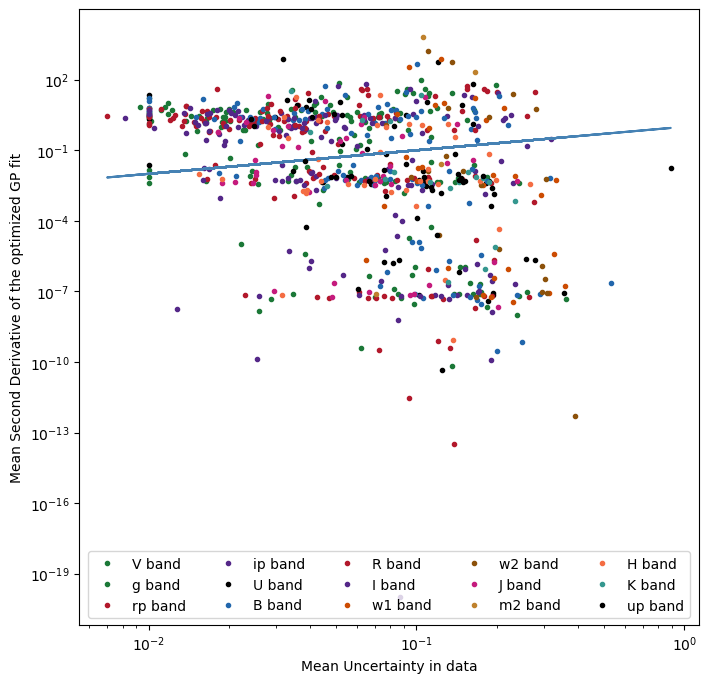

In [281]:
# Now we plot the mean second derivatives of the init/opt GP fits 
# versus mean of the uncertainties in data.
# The idea is that the mean of the second derivate is correlated with the variance in the model.
# Therefore, if this mean of the second derivative is smaller than the mean uncertainty, them 
# the model is covering most of the features in the data.

plt.figure(figsize=(8,8))
all_high_var = 0
all_ = 0

# decide if you want to see the initial or the optimized GP fit
GP_mode = 'optimized'
if GP_mode == 'optimized':
    i = 2
elif GP_mode == 'initial':
    i = 1
    
for b in variances.keys():
    
    # This is the one-to-one line for the mean uncertainties in data
    plt.plot((np.asarray(variances[b])[:,3]).astype(float),
             (np.asarray(variances[b])[:,3]).astype(float),
             '-',
            color = 'SteelBlue')

    # This is the mean second derivative of the init/opt GP fit versus 
    # mean uncertainties in the data.
    plt.plot((np.asarray(variances[b])[:,3]).astype(float),
             (np.asarray(variances[b])[:,i]).astype(float),
             '.',
             color = colors[b],
            label='%s band'%b)
    
    # We save the number of all SNe in all bands
    all_ += len(np.asarray(variances[b])[:,3])
    
    # We save the number of SNe in all band that have: 
    #(mean second der of init/opt GP fit/mean uncertainty in data)>1
    all_high_var += np.sum(((np.asarray(variances[b])[:,i]).astype(float)/
                (np.asarray(variances[b])[:,3]).astype(float))>1)
    
    # We save the indeces of SNe in all band that have: 
    #(mean second der of init/opt GP fit/mean uncertainty in data)>1
    ind = ((np.asarray(variances[b])[:,i]).astype(float)/
                (np.asarray(variances[b])[:,3]).astype(float))>1
    
    print('band %s'%b)
    
    print('Names of SNe with higher mean second var in the %s GP fit:'% GP_mode)
    # We print the names of SNe in all band that have: 
    #(mean second der of init/opt GP fit/mean uncertainty in data)>1
    print(np.asarray(variances[b])[:,0][ind])  
    # we print values of (mean second der of init/opt GP fit/mean uncertainty in data)
    # for those larger than 1:
    print(((np.asarray(variances[b])[:,i]).astype(float)/
                (np.asarray(variances[b])[:,3]).astype(float))[ind])
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower center', ncols=5)
plt.xlabel('Mean Uncertainty in data')
plt.ylabel('Mean Second Derivative of the %s GP fit'%GP_mode)

In [268]:
all_high_var/all_

0.5283018867924528